# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.2764,  0.3057,  0.4897,  0.787 ,  0.6627,  0.6034,  0.3722,  0.1886,  0.4145,  0.6801,
        0.5178,  0.4675,  0.3708,  0.9557,  0.1604,  0.4065,  0.8752,  0.6775,  0.1818,  0.2346,
        0.591 ,  0.9049,  0.9551,  0.3547,  0.7319,  0.5636,  0.7542,  0.7464,  0.2111,  0.1858])

In [6]:
y

array([  8.8293,   8.9171,   9.4692,  10.3611,   9.9881,   9.8102,   9.1167,   8.5659,   9.2436,
        10.0403,   9.5534,   9.4025,   9.1125,  10.8671,   8.4813,   9.2196,  10.6257,  10.0326,
         8.5453,   8.7038,   9.7731,  10.7148,  10.8654,   9.064 ,  10.1956,   9.6907,  10.2627,
        10.2393,   8.6334,   8.5573])

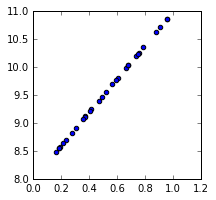

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1365

In [ ]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [ ]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani